In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [34]:
import numpy as np
from scipy.spatial import distance

import utilities as ut
from eden.graph import vectorize

import embedder

# load data: AIDS
Graphs, emb128,emb32, emb2, label  
NOTE: emb128 NOT SCALED

In [10]:
graphs_test,graphs_train,X_test_128,X_train_128,X_test_32,X_train_32,X_test_2,X_train_2,labels_test,labels_train = np.load("grafi_128_32_2_lab_test_train_aids.npy",allow_pickle=True)

In [35]:
# scale the embedding!!! 
scal = embedder.Preprocessing_scaler([0, 1]) 
X_train_128_scaled = scal.fit(X_train_128).transform(X_train_128)
X_test_128_scaled = scal.transform(X_test_128)

In [22]:
# remove big graphs #### ONLY PROTEINS ####
graphs_test,labels_test = ut.remove_big_graphs(graphs_test,labels_test)
graphs_train,labels_train = ut.remove_big_graphs(graphs_train,labels_train)

# VECTORIZE 
X_train_256 = vectorize(graphs_train,nbits =8,complexity=2)
X_test_256 = vectorize(graphs_test,nbits =8,complexity=2)
X_train_256 = X_train_256.A
X_test_256 = X_test_256.A

len input =  160  len output =  160
len input =  640  len output =  640


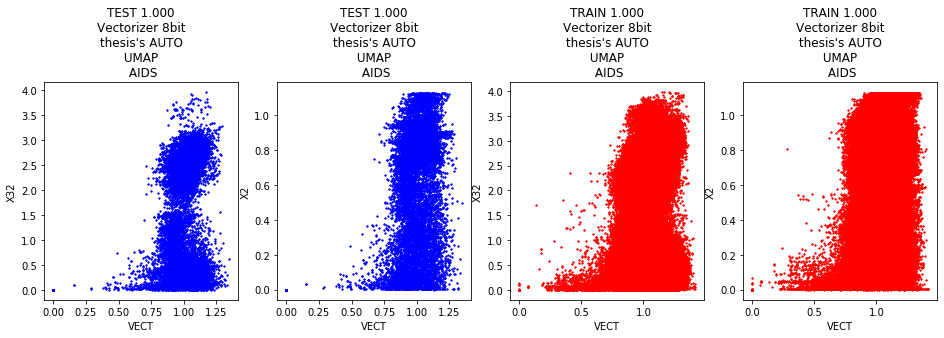

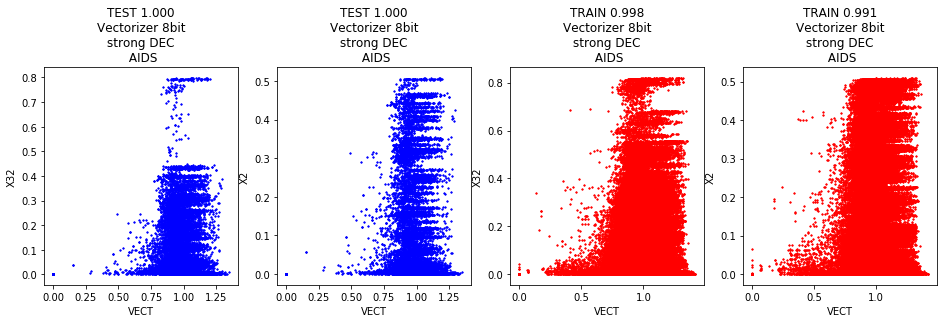

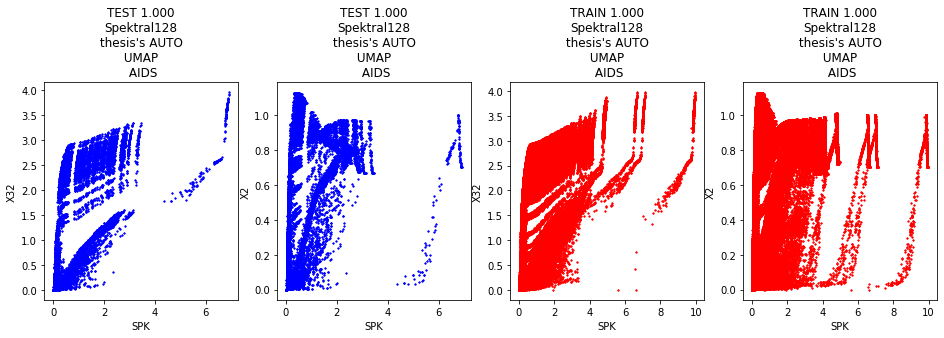

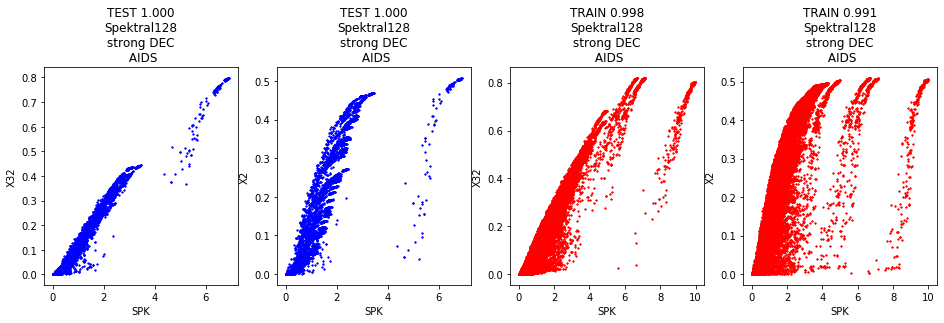

embedding UMAP


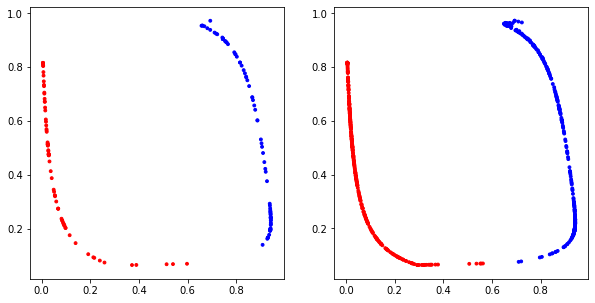

embedding dnn-strong encoder


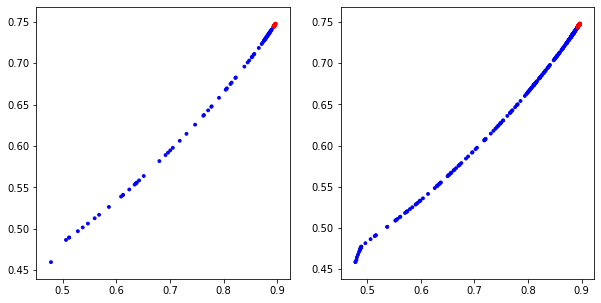

In [135]:
plot_md(X_test_256,X_train_256,
        X_test_32,X_train_32,
        X_test_2,X_train_2,
        labels_test,labels_train,
        ["VECT","\nVectorizer 8bit\n thesis's AUTO \n UMAP \n AIDS"])

plot_md(X_test_256,X_train_256,
        X_test_32_2,X_train_32_2,
        X_test_2_2,X_train_2_2,
        labels_test,labels_train,
        ["VECT","\nVectorizer 8bit\n strong DEC \n AIDS"])


plot_md(X_test_128_scaled,X_train_128_scaled,
        X_test_32,X_train_32,
        X_test_2,X_train_2,
        labels_test,labels_train,
        ["SPK","\nSpektral128\n thesis's AUTO \n UMAP \n AIDS"])

plot_md(X_test_128_scaled,X_train_128_scaled,
        X_test_32_2,X_train_32_2,
        X_test_2_2,X_train_2_2,
        labels_test,labels_train,
        ["SPK","\nSpektral128\n strong DEC \n AIDS"])


print("embedding UMAP")
plot2d_tmp(X_test_2,labels_test,X_train_2,labels_train)
print("embedding dnn-strong encoder")
plot2d_tmp(X_test_2_2,labels_test,X_train_2_2,labels_train)

# DHFR

In [136]:
graphs_test,graphs_train,X_test_128,X_train_128,X_test_32,X_train_32,X_test_2,X_train_2,labels_test,labels_train = np.load("grafi_128_32_2_lab_test_train_dhfr.npy",allow_pickle=True)

In [137]:
# scale the embedding!!! 
scal = embedder.Preprocessing_scaler([0, 1]) 
X_train_128_scaled = scal.fit(X_train_128).transform(X_train_128)
X_test_128_scaled = scal.transform(X_test_128)

In [138]:
# remove big graphs #### ONLY PROTEINS ####
graphs_test,labels_test = ut.remove_big_graphs(graphs_test,labels_test)
graphs_train,labels_train = ut.remove_big_graphs(graphs_train,labels_train)

# VECTORIZE 
X_train_256 = vectorize(graphs_train,nbits =8,complexity=2)
X_test_256 = vectorize(graphs_test,nbits =8,complexity=2)
X_train_256 = X_train_256.A
X_test_256 = X_test_256.A

len input =  118  len output =  118
len input =  472  len output =  472


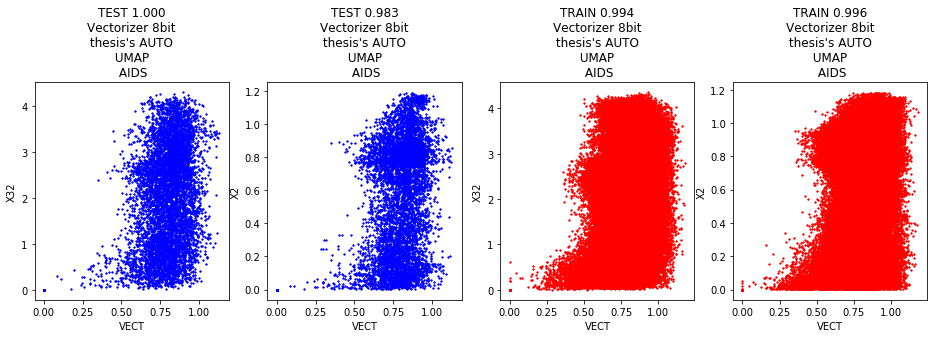

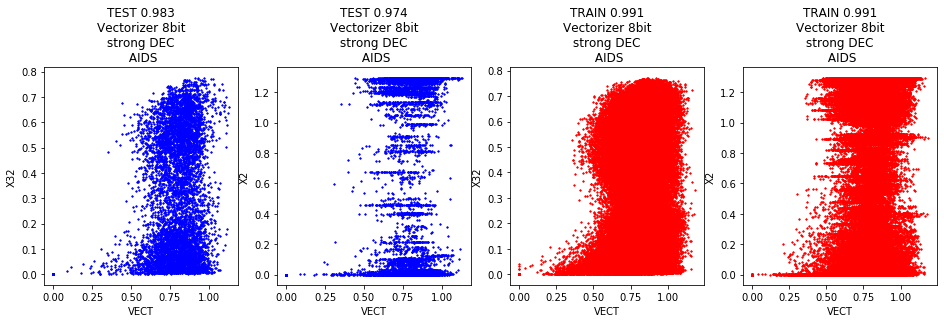

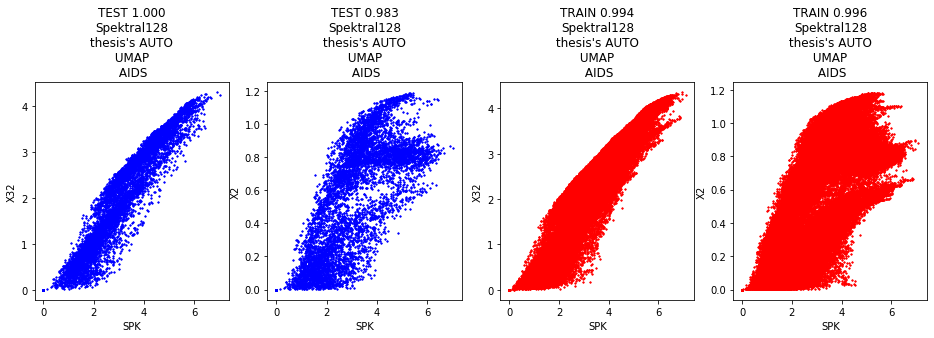

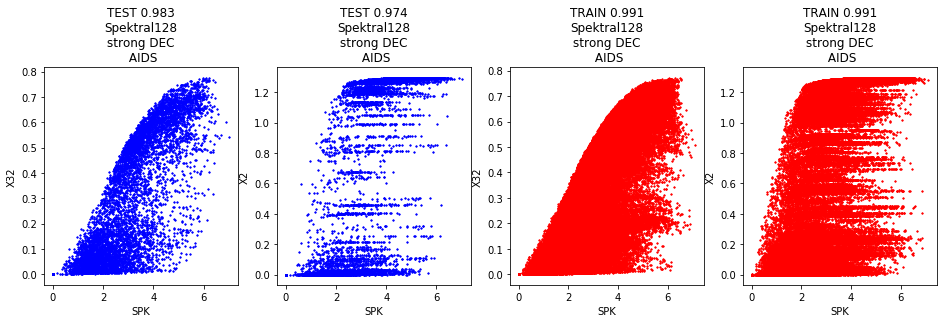

embedding UMAP


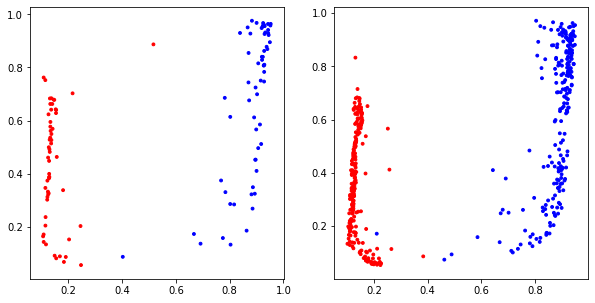

embedding dnn-strong encoder


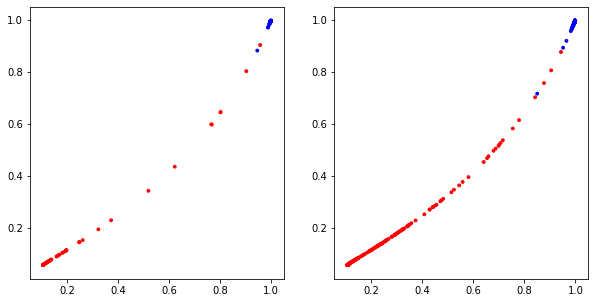

In [153]:
plot_md(X_test_256,X_train_256,
        X_test_32,X_train_32,
        X_test_2,X_train_2,
        labels_test,labels_train,
        ["VECT","\nVectorizer 8bit\n thesis's AUTO \n UMAP \n AIDS"])

plot_md(X_test_256,X_train_256,
        X_test_32_2,X_train_32_2,
        X_test_2_2,X_train_2_2,
        labels_test,labels_train,
        ["VECT","\nVectorizer 8bit\n strong DEC \n AIDS"])


plot_md(X_test_128_scaled,X_train_128_scaled,
        X_test_32,X_train_32,
        X_test_2,X_train_2,
        labels_test,labels_train,
        ["SPK","\nSpektral128\n thesis's AUTO \n UMAP \n AIDS"])

plot_md(X_test_128_scaled,X_train_128_scaled,
        X_test_32_2,X_train_32_2,
        X_test_2_2,X_train_2_2,
        labels_test,labels_train,
        ["SPK","\nSpektral128\n strong DEC \n AIDS"])


print("embedding UMAP")
plot2d_tmp(X_test_2,labels_test,X_train_2,labels_train)
print("embedding dnn-strong encoder")
plot2d_tmp(X_test_2_2,labels_test,X_train_2_2,labels_train)

# SUP AUTO to compute "strong_decoder"

In [147]:
import load_data as ld
import embedder_generator as gen
import embedder
import utilities as ut

from sklearn.model_selection import train_test_split

import keras.backend as K
from my_callbacks import MyCallback_sinusoidal
from sklearn.preprocessing import Normalizer

In [148]:
w_dec = K.variable(1)
w_cla = K.variable(1)
input_auto = len(X_train_128[0])
auto_epochs = 100
auto_plateau = 10
auto_k = 1
auto_n_period = 4
auto_scale_c = 0.000001
auto_scale_d = 0.1


In [149]:
auto2, enc2 = gen.gen_sup_auto_callback(w_dec,w_cla,input_auto,embedding_size=32,n_classes=2,classifier_penultimate_layer_size=15)
# CALLBACK  
my_call_sin2 = MyCallback_sinusoidal(w_dec, w_cla, auto_epochs,auto_plateau,auto_k,auto_n_period,auto_scale_c,auto_scale_d)
# SCALER
scal2 = embedder.Preprocessing_scaler([0, 1])    
# NORMALIZER
norm2 = Normalizer(copy=True, norm='l2')

emb_auto2 = embedder.Transformer_sup_autoencoder(autoencoder = auto2,
                                                 encoder = enc2,
                                                 batch_size = 32,
                                                 validation_split = 0.2,
                                                 epochs = auto_epochs,
                                                 callbacks = [my_call_sin2],
                                                 verbose = 0,
                                                 normal = norm2,
                                                 scaler = scal2)

emb_auto2.fit(X_train_128,labels_train)

X_train_32_2 = emb_auto2.transform(X_train_128)
X_test_32_2 = emb_auto2.transform(X_test_128)

In [150]:
ut.evaluate_emb_train_test(X_test_32_2,labels_test,X_train_32_2,labels_train)


DIM: 32             TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.983    0.991


In [151]:
w_dec = K.variable(1)
w_cla = K.variable(1)
input_auto = len(X_train_32_2[0])
auto_epochs = 100
auto_plateau = 10
auto_k = 1
auto_n_period = 4
auto_scale_c = 0.000001
auto_scale_d = 0.1



auto2, enc2 = gen.gen_sup_auto_callback(w_dec,w_cla,input_auto,embedding_size=2,n_classes=2,classifier_penultimate_layer_size=15)
# CALLBACK  
my_call_sin2 = MyCallback_sinusoidal(w_dec, w_cla, auto_epochs,auto_plateau,auto_k,auto_n_period,auto_scale_c,auto_scale_d)
# SCALER
scal2 = embedder.Preprocessing_scaler([0, 1])    
# NORMALIZER
norm2 = Normalizer(copy=True, norm='l2')

emb_auto2 = embedder.Transformer_sup_autoencoder(autoencoder = auto2,
                                                 encoder = enc2,
                                                 batch_size = 32,
                                                 validation_split = 0.2,
                                                 epochs = auto_epochs,
                                                 callbacks = [my_call_sin2],
                                                 verbose = 0,
                                                 normal = norm2,
                                                 scaler = scal2)

emb_auto2.fit(X_train_32_2,labels_train)

X_train_2_2 = emb_auto2.transform(X_train_32_2)
X_test_2_2 = emb_auto2.transform(X_test_32_2)

In [152]:
ut.evaluate_emb_train_test(X_test_2_2,labels_test,X_train_2_2,labels_train)


DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.974    0.991


# methods

In [131]:
def plot_md(tesths,trainhs,test32,train32,test2,train2,lab_test,lab_train, text = ["Vectorizer or SPK","TITLE"]):
    dm_X2_test = distance.squareform(distance.pdist(test2, metric='euclidean'))
    dm_X2_train = distance.squareform(distance.pdist(train2, metric='euclidean'))

    dm_X32_test = distance.squareform(distance.pdist(test32, metric='euclidean'))
    dm_X32_train = distance.squareform(distance.pdist(train32, metric='euclidean'))

    dm_Xhs_test = distance.squareform(distance.pdist(tesths, metric='euclidean'))
    dm_Xhs_train = distance.squareform(distance.pdist(trainhs, metric='euclidean'))
    
    a_32_test, a_32_train = ut.evaluate_emb_train_test(test32,lab_test,train32,lab_train,return_value=True)
    a_2_test, a_2_train = ut.evaluate_emb_train_test(test2,lab_test,train2,lab_train,return_value=True)
    
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    plt.title("TEST "+ a_32_test + text[-1])
    plt.scatter(dm_Xhs_test,dm_X32_test,s=1, c='b')
    plt.xlabel(text[0])
    plt.ylabel("X32")
    plt.subplot(142)
    plt.title("TEST " + a_2_test + text[-1])
    plt.scatter(dm_Xhs_test,dm_X2_test,s=1, c='b')
    plt.xlabel(text[0])
    plt.ylabel("X2")

    plt.subplot(143)
    plt.title("TRAIN " + a_32_train + text[-1])
    plt.scatter(dm_Xhs_train,dm_X32_train,s=1, c='r')
    plt.xlabel(text[0])
    plt.ylabel("X32")
    plt.subplot(144)
    plt.title("TRAIN "+ a_2_train  + text[-1])
    plt.scatter(dm_Xhs_train,dm_X2_train,s=1, c='r')
    plt.xlabel(text[0])
    plt.ylabel("X2")
    plt.show()
    
    
    
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
def plot2d_tmp(res_test,y_test,res_train,y_train):
    _,[pos_tra,neg_tra] = np.unique(y_train,return_counts=True)
    _,[pos_tes,neg_tes] = np.unique(y_test,return_counts=True)

    colors = ['red','blue']
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    x = res_test[:,0]
    y = res_test[:,1]
    plt.scatter(x,y,s=8,c=y_test,cmap=matplotlib.colors.ListedColormap(colors))


    plt.subplot(122)
    x = res_train[:,0]
    y = res_train[:,1]
    plt.scatter(x,y,s=8,c=y_train,cmap=matplotlib.colors.ListedColormap(colors))

    plt.show()
    
